In [1]:
import pandas as pd
import sqlite3
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
%%bash
ls

CleanData.ipynb
ClimbingLogBook.zip
Data Analysis.ipynb
WebScrappingTool.ipynb
database.sqlite


In [3]:
# Read sqlite query results into a pandas DataFrame
def qry(q, connection = sqlite3.connect("../PassionProject/database.sqlite")):
    df = pd.read_sql_query(q, connection)
    connection.close
    return df

### Accessing sqlite database

In [4]:
tables = qry("""
    SELECT name FROM sqlite_master
""")

# Get Col + info
columns_in_table = pd.DataFrame()
for i in tables.name:
    df_i = qry("PRAGMA TABLE_INFO(" + i + ");")
    df_i['table_name'] = i
    columns_in_table = columns_in_table.append(df_i)
tables = tables.name
print(tables)

0      user
1    method
2     grade
3    ascent
Name: name, dtype: object


/var/folders/b8/qw7xf4r16w383xrhw3980l4w0000gp/T/ipykernel_5776/2482935748.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  columns_in_table = columns_in_table.append(df_i)
/var/folders/b8/qw7xf4r16w383xrhw3980l4w0000gp/T/ipykernel_5776/2482935748.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  columns_in_table = columns_in_table.append(df_i)
/var/folders/b8/qw7xf4r16w383xrhw3980l4w0000gp/T/ipykernel_5776/2482935748.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  columns_in_table = columns_in_table.append(df_i)
/var/folders/b8/qw7xf4r16w383xrhw3980l4w0000gp/T/ipykernel_5776/2482935748.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.con

In [5]:
# work w dataframes
df_user = qry("SELECT * FROM USER")
df_grade = qry("SELECT * FROM grade")
df_method = qry("SELECT * FROM method")
df_ascent = qry("SELECT * FROM ascent")

### Cleaning up df_user tables to prepare for merging

In [6]:
df_user.head()

,id,first_name,last_name,city,country,sex,height,weight,started,competitions,...,sponsor2,sponsor3,best_area,worst_area,guide_area,interests,birth,presentation,deactivated,anonymous
0,1,first,last,Göteborg,SWE,0,177,73,1996,,...,,,"Railay beach, Krabi, Thailand",None,,,1976-03-10,,0,0
1,2,first,last,stockholm,SWE,0,0,0,2000,,...,,,,,,,None,,0,0
2,3,first,last,Umeå,SWE,0,180,78,1995,,...,,,Hell,Umeå,,,1973-09-09,,0,0
3,4,first,last,Goteborg,SWE,1,165,58,2001,,...,,,,None,,,1984-07-26,,0,0
4,5,first,last,North Attleboro,USA,0,0,0,1991,,...,,,,None,,,1969-05-07,,0,0


In [7]:
df_user.shape

(62593, 22)

In [8]:
df_user.columns

Index(['id', 'first_name', 'last_name', 'city', 'country', 'sex', 'height',
       'weight', 'started', 'competitions', 'occupation', 'sponsor1',
       'sponsor2', 'sponsor3', 'best_area', 'worst_area', 'guide_area',
       'interests', 'birth', 'presentation', 'deactivated', 'anonymous'],
      dtype='object')

In [9]:
#Clean up user data by dropping columns I am not intersted in
dropped_user_columns =['first_name', 'last_name', 'competitions', 'occupation', 'sponsor1',
       'sponsor2', 'sponsor3', 'best_area', 'worst_area', 'guide_area',
       'interests','presentation', 'deactivated', 'anonymous']
df_user.rename(columns={'id': 'user_id'}, inplace=True)
cleaned_up_users = df_user.drop(dropped_user_columns, axis=1)

#Changing numeric 'sex' value to alphabets (M and F)
cleaned_up_users['sex'] = cleaned_up_users['sex'].map({0:'M', 1:'F'})
cleaned_up_users.head()

,user_id,first_name,last_name,city,country,sex,height,weight,started,birth
0,1,first,last,Göteborg,SWE,M,177,73,1996,1976-03-10
1,2,first,last,stockholm,SWE,M,0,0,2000,None
2,3,first,last,Umeå,SWE,M,180,78,1995,1973-09-09
3,4,first,last,Goteborg,SWE,F,165,58,2001,1984-07-26
4,5,first,last,North Attleboro,USA,M,0,0,1991,1969-05-07


### Cleaning up df_grade tables to prepare for merging

In [10]:
df_grade.head()

,id,score,fra_routes,fra_routes_input,fra_routes_selector,fra_boulders,fra_boulders_input,fra_boulders_selector,usa_routes,usa_routes_input,usa_routes_selector,usa_boulders,usa_boulders_input,usa_boulders_selector
0,1,0,-,1,1,-,1,1,3/4,1,1,VB,1,1
1,2,0,1,0,0,1,0,0,,0,0,,0,0
2,3,0,1a,0,0,1A,0,0,,0,0,,0,0
3,4,0,1b,0,0,1B,0,0,,0,0,,0,0
4,5,0,1c,0,0,1C,0,0,,0,0,,0,0


In [11]:
df_grade.shape

(83, 14)

In [12]:
df_grade.columns

Index(['id', 'score', 'fra_routes', 'fra_routes_input', 'fra_routes_selector',
       'fra_boulders', 'fra_boulders_input', 'fra_boulders_selector',
       'usa_routes', 'usa_routes_input', 'usa_routes_selector', 'usa_boulders',
       'usa_boulders_input', 'usa_boulders_selector'],
      dtype='object')

In [13]:
#Clean up grades
df_grade.rename(columns={'id':'grade_id'}, inplace=True)
drop_fra_columns = ['score', 'fra_routes', 'fra_routes_input', 'fra_routes_selector',
       'fra_boulders', 'fra_boulders_input', 'fra_boulders_selector',
       'usa_routes', 'usa_routes_input', 'usa_routes_selector','usa_boulders_selector', 'usa_boulders_input']
usa_boulders = df_grade.drop(drop_fra_columns, axis=1)
usa_boulders.head()

,grade_id,usa_boulders
0,1,VB
1,2,
2,3,
3,4,
4,5,


In [14]:
usa_boulders.usa_boulders.values

array(['VB', '', '', '', '', '', 'VB', '', '', '', 'VB', 'VB', 'VB', '',
       'VB', '', 'V0-', '', '', '', 'V0', '', 'V0', '', 'V0', '', '', '',
       'V1', 'V1', 'V1', 'V1', 'V2', 'V2', '', 'V3', '', 'V3/4', '', 'V4',
       '', 'V4/V5', 'V4/V5', 'V5', 'V5', 'V5/V6', '', 'V6', '', 'V7', '',
       'V8', '', 'V8/9', '', 'V9', '', 'V10', '', 'V11', '', 'V12', '',
       'V13', '', 'V14', '', 'V15', 'V15/16', 'V16', 'V16/17', 'V17',
       'V17/18', 'V18', 'V18/19', 'V19', 'V19/20', 'V20', '', '', '', '',
       ''], dtype=object)

In [15]:
#Obtaining the grades of the climbs performed
usa_boulder_grades = usa_boulders['usa_boulders']
usa_boulder_grades.drop_duplicates(inplace=True)
usa_boulder_grades = usa_boulder_grades.values
usa_boulder_grades

array(['VB', '', 'V0-', 'V0', 'V1', 'V2', 'V3', 'V3/4', 'V4', 'V4/V5',
       'V5', 'V5/V6', 'V6', 'V7', 'V8', 'V8/9', 'V9', 'V10', 'V11', 'V12',
       'V13', 'V14', 'V15', 'V15/16', 'V16', 'V16/17', 'V17', 'V17/18',
       'V18', 'V18/19', 'V19', 'V19/20', 'V20'], dtype=object)

### Clean up df_ascent table

In [16]:
df_ascent.head()

,id,user_id,grade_id,notes,raw_notes,method_id,climb_type,total_score,date,year,...,country,comment,rating,description,yellow_id,climb_try,repeat,exclude_from_ranking,user_recommended,chipped
0,2,1,36,,0,3,0,545,918342000,1999,...,THA,Thailand\n,0,,255,0,0,0,0,0
1,3,1,36,,0,3,0,545,925509600,1999,...,,\n,0,,0,0,0,0,0,0
2,4,1,36,,0,3,0,545,933026400,1999,...,SWE,\n,0,,255,0,0,0,0,0
3,5,1,36,,0,3,0,545,933026400,1999,...,SWE,\n,0,,255,0,0,0,0,0
4,6,1,36,,0,3,0,545,933458400,1999,...,,\n,0,,0,0,0,0,0,0


In [17]:
df_ascent.shape

(4111877, 28)

In [18]:
df_ascent.columns

Index(['id', 'user_id', 'grade_id', 'notes', 'raw_notes', 'method_id',
       'climb_type', 'total_score', 'date', 'year', 'last_year', 'rec_date',
       'project_ascent_date', 'name', 'crag_id', 'crag', 'sector_id', 'sector',
       'country', 'comment', 'rating', 'description', 'yellow_id', 'climb_try',
       'repeat', 'exclude_from_ranking', 'user_recommended', 'chipped'],
      dtype='object')

In [19]:
dropped_columns_ascent = ['id', 'notes', 'raw_notes', 'total_score', 'comment', 'description', 'yellow_id', 'climb_try', 'repeat', 'exclude_from_ranking','user_recommended','chipped','rating','project_ascent_date','last_year','climb_type','rec_date','date']
cleaned_up_ascent = df_ascent.drop(dropped_columns_ascent, axis=1)
cleaned_up_ascent.head()

,user_id,grade_id,method_id,year,name,crag_id,crag,sector_id,sector,country
0,1,36,3,1999,The King And I,16596,Railay,61,Dum's kitchen,THA
1,1,36,3,1999,vet ej,0,Nya berg - segl.,0,,
2,1,36,3,1999,Mr Big,209,Sjöända,371,Huvudväggen,SWE
3,1,36,3,1999,Tak ska du ha,209,Sjöända,371,Huvudväggen,SWE
4,1,36,3,1999,Korpen flyger,0,"Rankulla, Vetlanda",0,,


### Combining all the charts

In [20]:
combined_data = cleaned_up_users.merge(cleaned_up_ascent,on='user_id').merge(usa_boulders, on='grade_id')
combined_data.head()

,user_id,first_name,last_name,city,country_x,sex,height,weight,started,birth,grade_id,method_id,year,name,crag_id,crag,sector_id,sector,country_y,usa_boulders
0,1,first,last,Göteborg,SWE,M,177,73,1996,1976-03-10,36,3,1999,The King And I,16596,Railay,61,Dum's kitchen,THA,V3
1,1,first,last,Göteborg,SWE,M,177,73,1996,1976-03-10,36,3,1999,vet ej,0,Nya berg - segl.,0,,,V3
2,1,first,last,Göteborg,SWE,M,177,73,1996,1976-03-10,36,3,1999,Mr Big,209,Sjöända,371,Huvudväggen,SWE,V3
3,1,first,last,Göteborg,SWE,M,177,73,1996,1976-03-10,36,3,1999,Tak ska du ha,209,Sjöända,371,Huvudväggen,SWE,V3
4,1,first,last,Göteborg,SWE,M,177,73,1996,1976-03-10,36,3,1999,Korpen flyger,0,"Rankulla, Vetlanda",0,,,V3


In [21]:
combined_data.shape

(4110933, 20)

### Dropping duplicates in the "final" table

In [22]:
com_dups = combined_data.drop_duplicates(subset=None, keep='first', inplace=False)
com_dups.head()

,user_id,first_name,last_name,city,country_x,sex,height,weight,started,birth,grade_id,method_id,year,name,crag_id,crag,sector_id,sector,country_y,usa_boulders
0,1,first,last,Göteborg,SWE,M,177,73,1996,1976-03-10,36,3,1999,The King And I,16596,Railay,61,Dum's kitchen,THA,V3
1,1,first,last,Göteborg,SWE,M,177,73,1996,1976-03-10,36,3,1999,vet ej,0,Nya berg - segl.,0,,,V3
2,1,first,last,Göteborg,SWE,M,177,73,1996,1976-03-10,36,3,1999,Mr Big,209,Sjöända,371,Huvudväggen,SWE,V3
3,1,first,last,Göteborg,SWE,M,177,73,1996,1976-03-10,36,3,1999,Tak ska du ha,209,Sjöända,371,Huvudväggen,SWE,V3
4,1,first,last,Göteborg,SWE,M,177,73,1996,1976-03-10,36,3,1999,Korpen flyger,0,"Rankulla, Vetlanda",0,,,V3


Renaming columns in the combined chart

In [23]:
com_dups.rename(columns={'country_x':'user_country'}, inplace=True)
com_dups.rename(columns={'country_y':'boulder_country'}, inplace=True)
com_dups.rename(columns={'usa_boulders':'usa_boulder_scale'}, inplace=True)
com_dups.head()

/var/folders/b8/qw7xf4r16w383xrhw3980l4w0000gp/T/ipykernel_5776/854807295.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  com_dups.rename(columns={'country_x':'user_country'}, inplace=True)
/var/folders/b8/qw7xf4r16w383xrhw3980l4w0000gp/T/ipykernel_5776/854807295.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  com_dups.rename(columns={'country_y':'boulder_country'}, inplace=True)
/var/folders/b8/qw7xf4r16w383xrhw3980l4w0000gp/T/ipykernel_5776/854807295.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org

# FINAL TABLE TO BE USED FOR ANALYSIS

In [95]:
#Noticed some empty strings in the USA boulder_scale and went in to clean them up
drop_value_com_dups = com_dups[com_dups.usa_boulder_scale.values != '']
drop_value_com_dups.head()

,user_id,city,user_country,sex,height,weight,started,birth,grade_id,method_id,year,name,crag_id,crag,sector_id,sector,boulder_country,usa_boulder_scale
0,1,Göteborg,SWE,M,177,73,1996,1976-03-10,36,3,1999,The King And I,16596,Railay,61,Dum's kitchen,THA,V3
1,1,Göteborg,SWE,M,177,73,1996,1976-03-10,36,3,1999,vet ej,0,Nya berg - segl.,0,,,V3
2,1,Göteborg,SWE,M,177,73,1996,1976-03-10,36,3,1999,Mr Big,209,Sjöända,371,Huvudväggen,SWE,V3
3,1,Göteborg,SWE,M,177,73,1996,1976-03-10,36,3,1999,Tak ska du ha,209,Sjöända,371,Huvudväggen,SWE,V3
4,1,Göteborg,SWE,M,177,73,1996,1976-03-10,36,3,1999,Korpen flyger,0,"Rankulla, Vetlanda",0,,,V3


In [97]:
drop_value_com_dups.shape

(4069163, 18)

### Analysis of gender vs difficulty completed

In [114]:
gender_v_grade = drop_value_com_dups[['sex','usa_boulder_scale']]
gender_v_grade.head()

,sex,usa_boulder_scale
0,M,V3
1,M,V3
2,M,V3
3,M,V3
4,M,V3


In [115]:
#Getting the male climbers 
male_grade = gender_v_grade[gender_v_grade['sex']=='M']
male_grade_chart = pd.DataFrame(male_grade.value_counts())
male_grade_chart = male_grade_chart.droplevel(0, axis=0) 
male_grade_chart.rename(columns={0:'m_count'}, inplace=True)
male_grade_chart.head()

,m_count
usa_boulder_scale,
V6,480823
V7,350615
V8,300115
V5,286866
V4,255086


In [116]:
#Getting the female climbers
female_grade = gender_v_grade[gender_v_grade['sex']=='F']
female_grade_chart = pd.DataFrame(female_grade.value_counts())
female_grade_chart=female_grade_chart.droplevel(0, axis=0) 
female_grade_chart.rename(columns={0:'f_count'}, inplace=True)
female_grade_chart.head()

,f_count
usa_boulder_scale,
V6,52862
V3,45270
V4,45238
V5,43482
V7,36500


In [117]:
#Combined the number of climbs performed at each grade for each gender
frames = [male_grade_chart,female_grade_chart]
grade_chart_result = pd.concat(frames, axis=1)
grade_chart_result = grade_chart_result.fillna(0)
grade_chart_result

,m_count,f_count
usa_boulder_scale,,
V6,480823,52862.0
V7,350615,36500.0
V8,300115,28081.0
V5,286866,43482.0
V4,255086,45238.0
V8/9,238727,20267.0
V3,226664,45270.0
V5/V6,215310,31669.0
V9,209076,15611.0


In [118]:
#Attempting to order the climbing grades in the correct order
grade_chart_result = grade_chart_result.reset_index()
grade_chart_result

,usa_boulder_scale,m_count,f_count
0,V6,480823,52862.0
1,V7,350615,36500.0
2,V8,300115,28081.0
3,V5,286866,43482.0
4,V4,255086,45238.0
5,V8/9,238727,20267.0
6,V3,226664,45270.0
7,V5/V6,215310,31669.0
8,V9,209076,15611.0
9,V4/V5,193622,32041.0


In [119]:
#Manually going in to correct climbing grade order 
grade_chart_result['usa_boulder_scale'] = pd.Categorical(grade_chart_result['usa_boulder_scale'], ['VB', 'V0-', 'V0', 'V1', 'V2', 'V3', 'V3/4', 'V4', 'V4/V5',
       'V5', 'V5/V6', 'V6', 'V7', 'V8', 'V8/9', 'V9', 'V10', 'V11', 'V12',
       'V13', 'V14', 'V15', 'V15/16', 'V16', 'V16/17', 'V17', 'V17/18',
       'V18', 'V18/19', 'V19', 'V19/20', 'V20'])

grade_chart_result = grade_chart_result.sort_values(['usa_boulder_scale'])
grade_chart_result

,usa_boulder_scale,m_count,f_count
18,VB,12329,2500.0
22,V0-,1431,348.0
16,V0,43685,10283.0
13,V1,120963,26886.0
14,V2,113909,24499.0
6,V3,226664,45270.0
10,V3/4,171042,32250.0
4,V4,255086,45238.0
9,V4/V5,193622,32041.0
3,V5,286866,43482.0


In [120]:
#Adding percentage to the chart
grade_chart_result['m_percent'] = (grade_chart_result['m_count'] / 
                  grade_chart_result['m_count'].sum()) * 100

grade_chart_result['f_percent'] = (grade_chart_result['f_count'] / 
                  grade_chart_result['f_count'].sum()) * 100

grade_chart_result

,usa_boulder_scale,m_count,f_count,m_percent,f_percent
18,VB,12329,2500.0,0.342606,0.531398
22,V0-,1431,348.0,0.039766,0.073971
16,V0,43685,10283.0,1.213946,2.185747
13,V1,120963,26886.0,3.361396,5.714869
14,V2,113909,24499.0,3.165375,5.207490
6,V3,226664,45270.0,6.298682,9.622558
10,V3/4,171042,32250.0,4.753023,6.855037
4,V4,255086,45238.0,7.088491,9.615757
9,V4/V5,193622,32041.0,5.380490,6.810612
3,V5,286866,43482.0,7.971613,9.242503


In [121]:
#Chart demonstrating the count each gender for each difficulty

# grade_chart_result[['usa_boulder_scale', 'm_count', 'f_count']].set_index('usa_boulder_scale').plot(kind = 'bar', fontsize=10, figsize=[16, 10], edgecolor='white', align='center', width = 1,)
# plt.xlabel("Boulder Difficulty")
# plt.ylabel("Number of Climbers")
# plt.title = ('Climbs Completed')
# plt.show()

#Chart not descriptive enough - Not useful/Will comment out

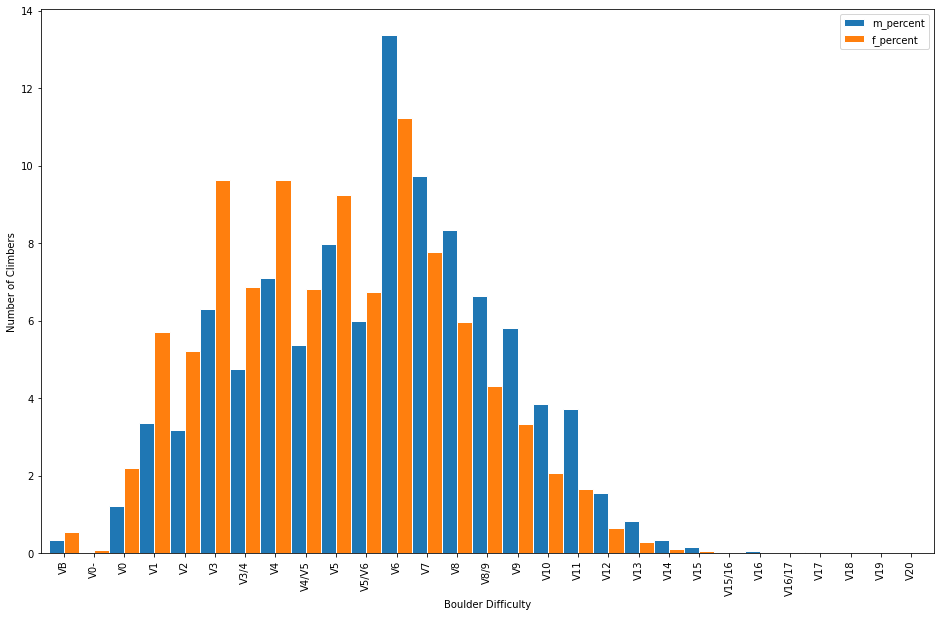

In [122]:
#Percentage chart creation
grade_chart_result[['usa_boulder_scale', 'm_percent', 'f_percent']].set_index('usa_boulder_scale').plot(kind = 'bar', fontsize=10, figsize=[16, 10], edgecolor='white', align='center', width = 1,)
plt.xlabel("Boulder Difficulty")
plt.ylabel("Number of Climbers")
plt.title = ('Percentage Climbs Completed')
plt.show()


### Gender composition pie chart creation

In [125]:
#Cleaning out for duplications of climber per user_id
user_dups = drop_value_com_dups.drop_duplicates(subset="user_id", keep='first', inplace=False)
user_dups.head()

,user_id,city,user_country,sex,height,weight,started,birth,grade_id,method_id,year,name,crag_id,crag,sector_id,sector,boulder_country,usa_boulder_scale
0,1,Göteborg,SWE,M,177,73,1996,1976-03-10,36,3,1999,The King And I,16596,Railay,61,Dum's kitchen,THA,V3
8,4,Goteborg,SWE,F,165,58,2001,1984-07-26,36,1,2006,Memory Hotel,22634,Squamish,0,,CAN,V3
10,5,North Attleboro,USA,M,0,0,1991,1969-05-07,36,2,2001,Free Beer,27657,Farley,0,,USA,V3
46,10,Göteborg,SWE,M,167,63,1992,1965-06-22,36,5,2002,NN pl. 14,22651,Hönö,0,,SWE,V3
63,13,norrkoping,SWE,M,0,0,2000,None,36,2,2000,Nollan,156,Ågelsjön,3241,Divaväggen,SWE,V3


In [134]:
user_dups[user_dups['sex']=='M'].shape

(30681, 18)

In [133]:
user_dups[user_dups['sex']=='F'].shape

(5347, 18)

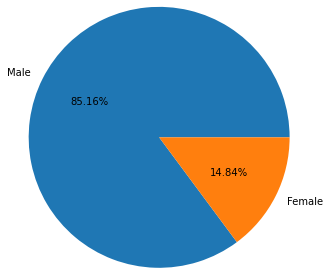

In [113]:
data = [30681, 5347]
pie_labels = ['Male','Female']
plt.pie(data, labels=pie_labels,labeldistance=1.1, radius=1.5, autopct = "%0.2f%%", startangle = 360)
plt.title = 'Gender Boulder Composition'
plt.show()


### Height vs difficulty of climb completed

In [36]:
height_v_difficulty = drop_value_com_dups[['height','usa_boulder_scale', 'sex']] 
height_v_difficulty = height_v_difficulty[(height_v_difficulty['height']>62)]
height_v_difficulty

,height,usa_boulder_scale,sex
0,177,V3,M
1,177,V3,M
2,177,V3,M
3,177,V3,M
4,177,V3,M
...,...,...,...
4110920,173,V19,M
4110921,185,V20,M
4110922,185,V20,M
4110923,185,V20,M


In [37]:
#Reorganizing the difficulty level

height_v_difficulty['usa_boulder_scale'] = pd.Categorical(height_v_difficulty['usa_boulder_scale'], ['VB', 'V0-', 'V0', 'V1', 'V2', 'V3', 'V3/4', 'V4', 'V4/V5',
       'V5', 'V5/V6', 'V6', 'V7', 'V8', 'V8/9', 'V9', 'V10', 'V11', 'V12',
       'V13', 'V14', 'V15', 'V15/16', 'V16', 'V16/17', 'V17', 'V17/18',
       'V18', 'V18/19', 'V19', 'V19/20', 'V20'])

height_v_difficulty = height_v_difficulty.sort_values(['usa_boulder_scale'])
height_v_difficulty

,height,usa_boulder_scale,sex
3910152,181,VB,M
3912432,192,VB,M
3912433,192,VB,M
3912434,192,VB,M
3912435,192,VB,M
...,...,...,...
4110906,185,V19,M
4110923,185,V20,M
4110921,185,V20,M
4110922,185,V20,M


In [38]:
#Getting FEMALES only
Fheight_v_difficulty = height_v_difficulty[height_v_difficulty['sex']=='F']
user_dups[user_dups['sex']=='M'].count()

,height,usa_boulder_scale,sex
3912528,165,VB,F
3912529,165,VB,F
3912535,170,VB,F
3912536,170,VB,F
3912537,170,VB,F
...,...,...,...
4107229,167,V17,F
4107228,153,V17,F
4107191,136,V17,F
4107190,136,V17,F


In [135]:
Fheight_v_difficulty.describe()

,height
count,337791.000000
mean,164.714978
std,8.864519
min,64.000000
25%,160.000000
50%,165.000000
75%,170.000000
max,255.000000


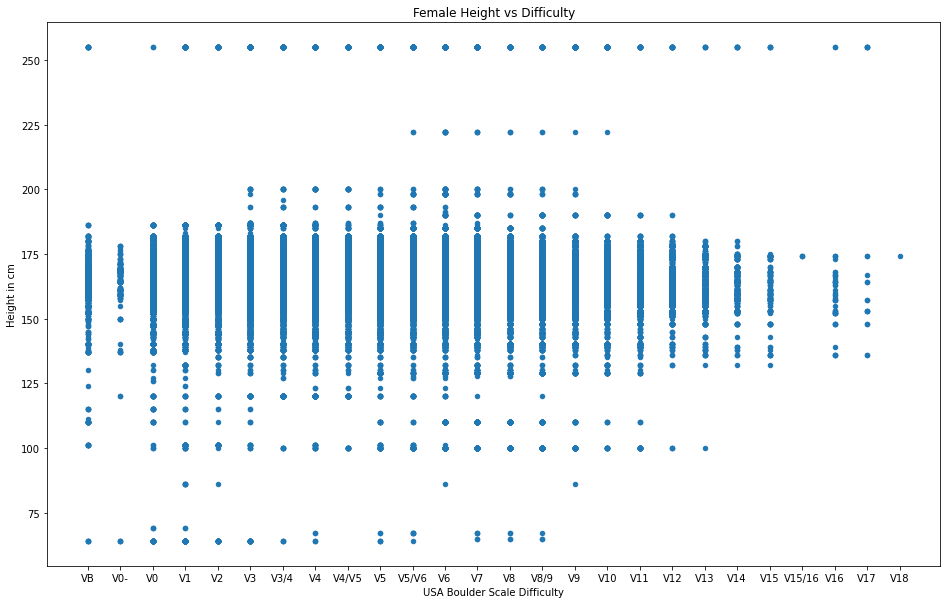

In [39]:
Fheight_v_difficulty.plot(
    x='usa_boulder_scale', 
    y='height', 
    kind='scatter',
    title='Female Height vs Difficulty',
    xlabel='USA Boulder Scale Difficulty',
    ylabel='Height in cm',
    fontsize=10,
    figsize=[16, 10]

)

plt.show()

<AxesSubplot:title={'center':'F Height vs Difficulty'}, xlabel='USA Boulder Scale Difficulty', ylabel='height in cm'>

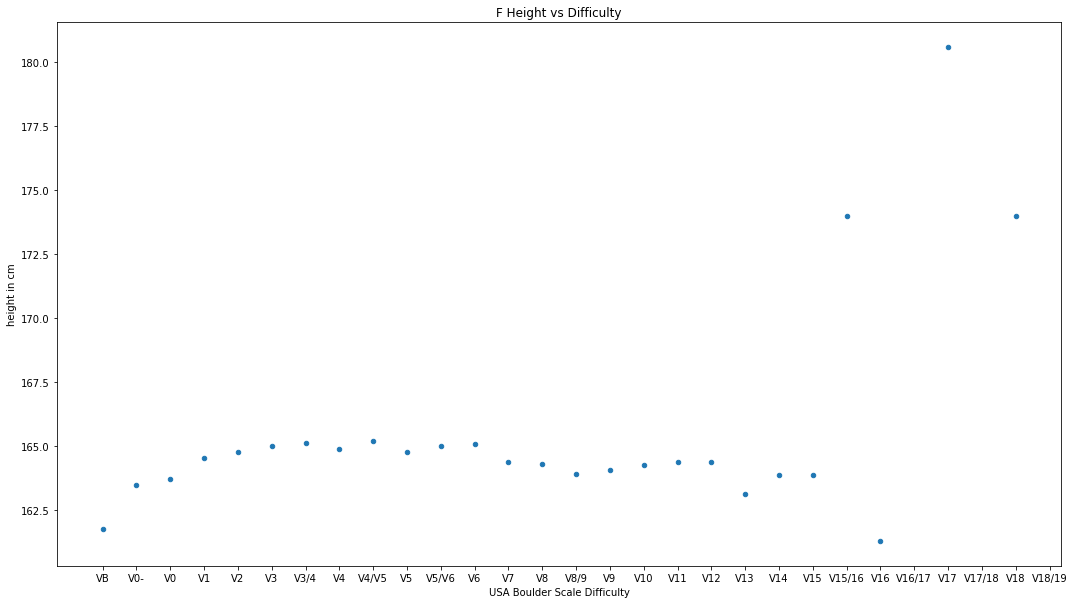

In [40]:
Fheight_v_difficulty.groupby(['usa_boulder_scale']).mean().reset_index().plot(
    x='usa_boulder_scale', 
    y='height', 
    kind='scatter',
    title='F Height vs Difficulty',
    xlabel='USA Boulder Scale Difficulty',
    ylabel='height in cm',
    fontsize=10,
    figsize=[18, 10]

)

In [41]:
#Getting MALES only
Mheight_v_difficulty = height_v_difficulty[height_v_difficulty['sex']=='M']
Mheight_v_difficulty

,height,usa_boulder_scale,sex
3910152,181,VB,M
3912432,192,VB,M
3912433,192,VB,M
3912434,192,VB,M
3912435,192,VB,M
...,...,...,...
4110906,185,V19,M
4110923,185,V20,M
4110921,185,V20,M
4110922,185,V20,M


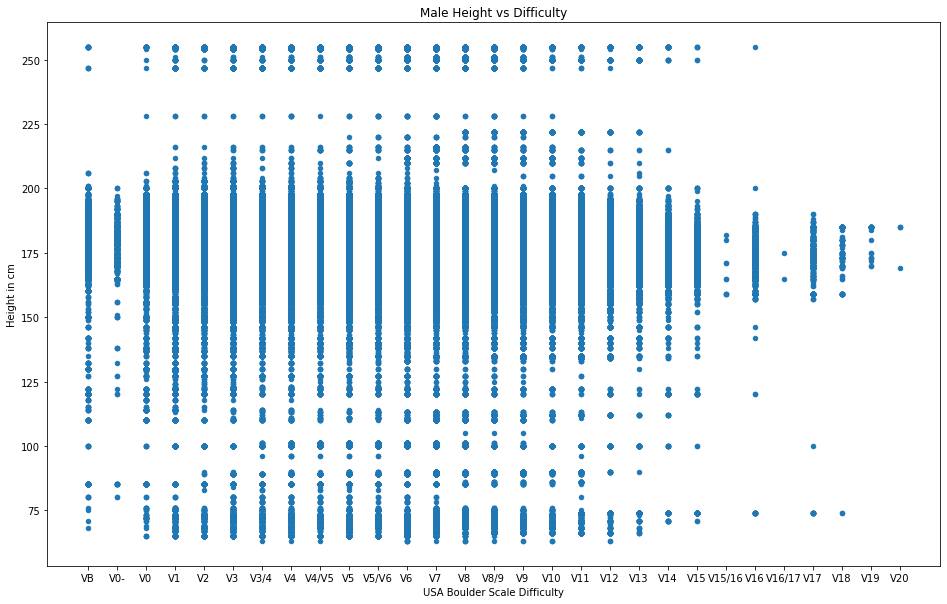

In [42]:
Mheight_v_difficulty.plot(
    x='usa_boulder_scale', 
    y='height', 
    kind='scatter',
    title='Male Height vs Difficulty',
    xlabel='USA Boulder Scale Difficulty',
    ylabel='Height in cm',
    fontsize=10,
    figsize=[16, 10]

)

plt.show()

<AxesSubplot:title={'center':'M Height vs Difficulty'}, xlabel='USA Boulder Scale Difficulty', ylabel='Height in cm'>

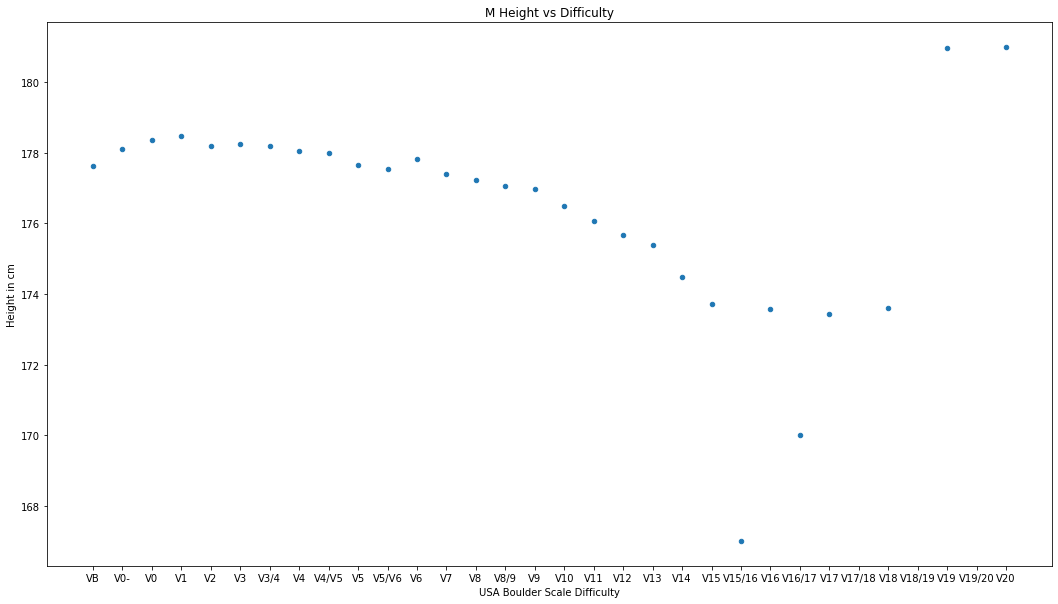

In [43]:
Mheight_v_difficulty.groupby(['usa_boulder_scale']).mean().reset_index().plot(
    x='usa_boulder_scale', 
    y='height', 
    kind='scatter',
    title='M Height vs Difficulty',
    xlabel='USA Boulder Scale Difficulty',
    ylabel='Height in cm',
    fontsize=10,
    figsize=[18, 10]

)

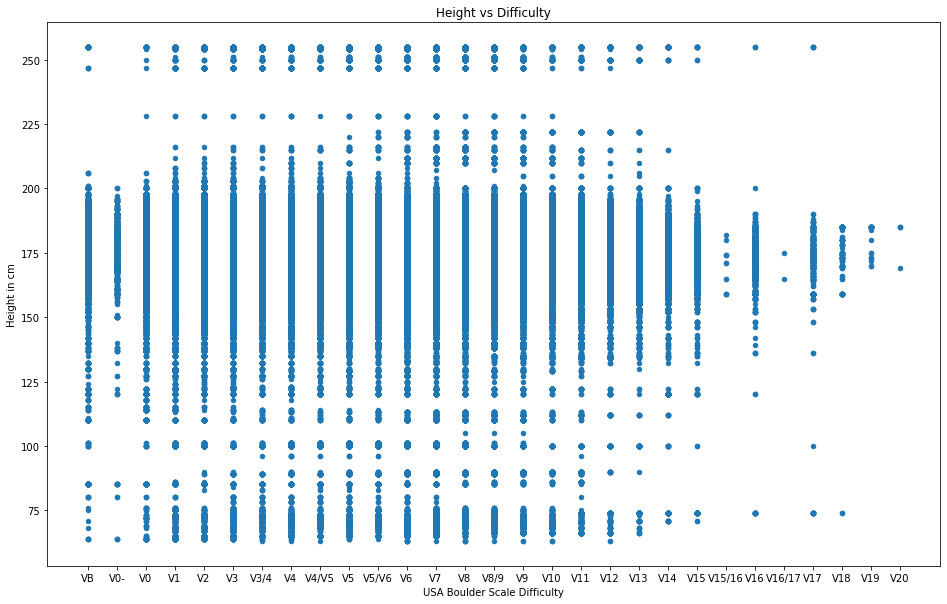

In [44]:
height_v_difficulty.plot(
    x='usa_boulder_scale', 
    y='height', 
    kind='scatter',
    title='Height vs Difficulty',
    xlabel='USA Boulder Scale Difficulty',
    ylabel='Height in cm',
    fontsize=10,
    figsize=[16, 10]

)

plt.show()

### Weight vs difficulty of climb completed

In [45]:
weight_v_difficulty = drop_value_com_dups[['weight','usa_boulder_scale','sex']]
weight_v_difficulty = weight_v_difficulty[(weight_v_difficulty['weight'])!=0]
weight_v_difficulty

,weight,usa_boulder_scale,sex
0,73,V3,M
1,73,V3,M
2,73,V3,M
3,73,V3,M
4,73,V3,M
...,...,...,...
4110920,53,V19,M
4110921,68,V20,M
4110922,68,V20,M
4110923,68,V20,M


In [46]:
#Re-arrange boulder scale
weight_v_difficulty['usa_boulder_scale'] = pd.Categorical(weight_v_difficulty['usa_boulder_scale'], ['VB', 'V0-', 'V0', 'V1', 'V2', 'V3', 'V3/4', 'V4', 'V4/V5',
       'V5', 'V5/V6', 'V6', 'V7', 'V8', 'V8/9', 'V9', 'V10', 'V11', 'V12',
       'V13', 'V14', 'V15', 'V15/16', 'V16', 'V16/17', 'V17', 'V17/18',
       'V18', 'V18/19', 'V19', 'V19/20', 'V20'])

weight_v_difficulty = weight_v_difficulty.sort_values(['usa_boulder_scale'])
weight_v_difficulty

,weight,usa_boulder_scale,sex
3910195,78,VB,M
3912600,63,VB,M
3912601,63,VB,M
3912602,63,VB,M
3912603,63,VB,M
...,...,...,...
4110906,68,V19,M
4110923,68,V20,M
4110921,68,V20,M
4110922,68,V20,M


<AxesSubplot:title={'center':'Weight(combined gender) vs Difficulty'}, xlabel='USA Boulder Scale Difficulty', ylabel='Weight in kg'>

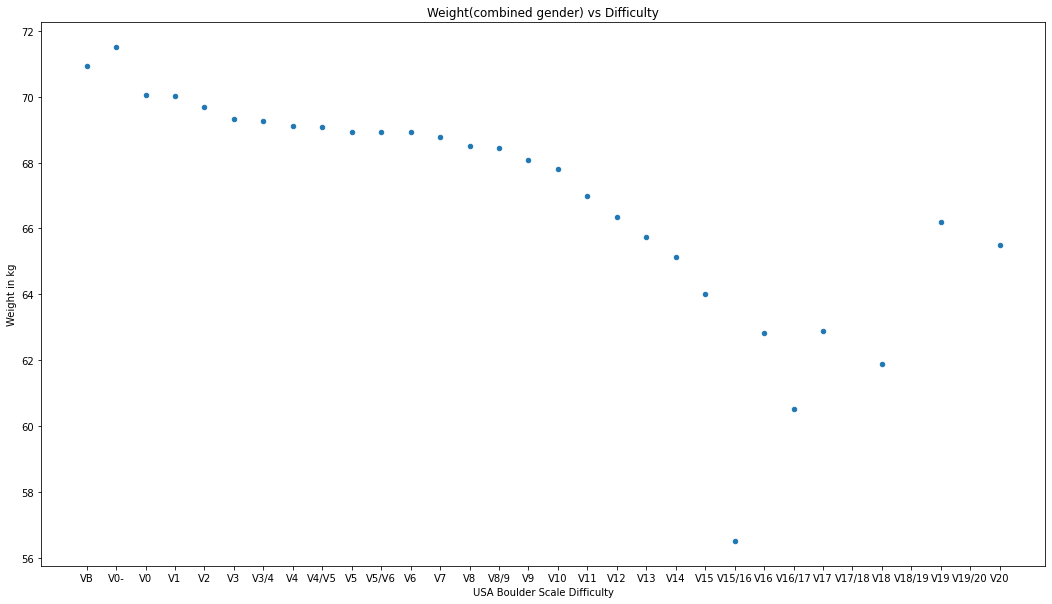

In [93]:
weight_v_difficulty.groupby(['usa_boulder_scale']).mean().reset_index().plot(
    x='usa_boulder_scale', 
    y='weight', 
    kind='scatter',
    title='Weight(combined gender) vs Difficulty',
    xlabel='USA Boulder Scale Difficulty',
    ylabel='Weight in kg',
    fontsize=10,
    figsize=[18, 10]

)

In [48]:
Fweight_v_difficulty = weight_v_difficulty[weight_v_difficulty['sex']=='F']
Fweight_v_difficulty

,weight,usa_boulder_scale,sex
3912594,40,VB,F
3912581,58,VB,F
3912621,58,VB,F
3912653,48,VB,F
3912666,53,VB,F
...,...,...,...
4105161,48,V16,F
4107229,48,V17,F
4107228,48,V17,F
4107169,40,V17,F


<AxesSubplot:title={'center':'Weight(F) vs Difficulty'}, xlabel='USA Boulder Scale Difficulty', ylabel='Weight in kg'>

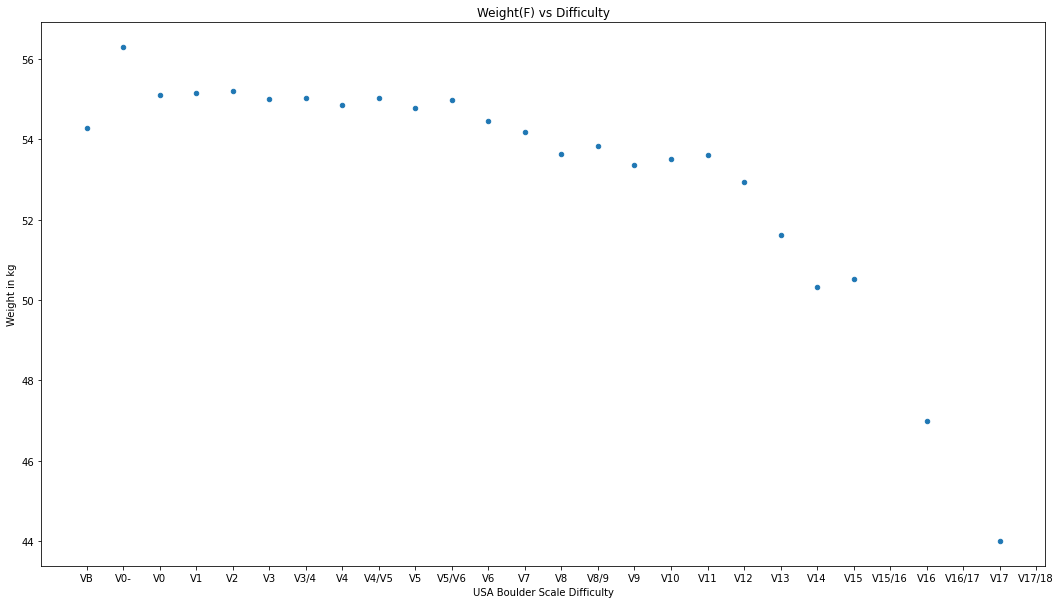

In [49]:
Fweight_v_difficulty.groupby(['usa_boulder_scale']).mean().reset_index().plot(
    x='usa_boulder_scale', 
    y='weight', 
    kind='scatter',
    title='Weight(F) vs Difficulty',
    xlabel='USA Boulder Scale Difficulty',
    ylabel='Weight in kg',
    fontsize=10,
    figsize=[18, 10]

)

In [50]:
Mweight_v_difficulty = weight_v_difficulty[weight_v_difficulty['sex']=='M']
Mweight_v_difficulty

,weight,usa_boulder_scale,sex
3910195,78,VB,M
3912600,63,VB,M
3912601,63,VB,M
3912602,63,VB,M
3912603,63,VB,M
...,...,...,...
4110906,68,V19,M
4110923,68,V20,M
4110921,68,V20,M
4110922,68,V20,M


<AxesSubplot:title={'center':'Weight(M) vs Difficulty'}, xlabel='USA Boulder Scale Difficulty', ylabel='Weight in kg'>

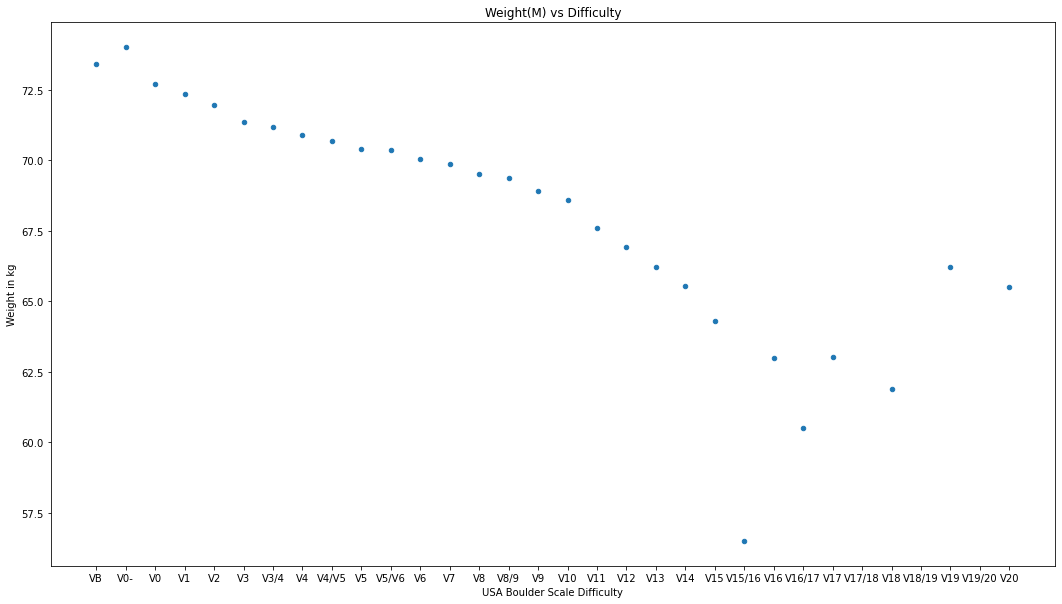

In [51]:
Mweight_v_difficulty.groupby(['usa_boulder_scale']).mean().reset_index().plot(
    x='usa_boulder_scale', 
    y='weight', 
    kind='scatter',
    title='Weight(M) vs Difficulty',
    xlabel='USA Boulder Scale Difficulty',
    ylabel='Weight in kg',
    fontsize=10,
    figsize=[18, 10]

)

### Length of time climbing vs difficulty completed

In [52]:
#Creating the dataframe for length of time climbing vs difficulty
length_of_time_v_difficulty = drop_value_com_dups[['started', 'year', 'usa_boulder_scale', 'sex']]
length_of_time_v_difficulty = length_of_time_v_difficulty[length_of_time_v_difficulty['started']>0]
length_of_time_v_difficulty

,started,year,usa_boulder_scale,sex
0,1996,1999,V3,M
1,1996,1999,V3,M
2,1996,1999,V3,M
3,1996,1999,V3,M
4,1996,1999,V3,M
...,...,...,...,...
4110920,2001,2015,V19,M
4110921,1999,2012,V20,M
4110922,1999,2013,V20,M
4110923,1999,2013,V20,M


In [53]:
length_of_time_v_difficulty.dtypes

started               int64
year                  int64
usa_boulder_scale    object
sex                  object
dtype: object

In [54]:
#Finding the length of time they were climbing by the time they climbed the crag
length_of_time_v_difficulty['length of climbing'] = length_of_time_v_difficulty['year'].values - length_of_time_v_difficulty['started'].values
length_of_time_v_difficulty = length_of_time_v_difficulty[length_of_time_v_difficulty['length of climbing']>0]
length_of_time_v_difficulty

,started,year,usa_boulder_scale,sex,length of climbing
0,1996,1999,V3,M,3
1,1996,1999,V3,M,3
2,1996,1999,V3,M,3
3,1996,1999,V3,M,3
4,1996,1999,V3,M,3
...,...,...,...,...,...
4110920,2001,2015,V19,M,14
4110921,1999,2012,V20,M,13
4110922,1999,2013,V20,M,14
4110923,1999,2013,V20,M,14


In [55]:
length_of_time_v_difficulty.sort_values(by='length of climbing') #116 years??

,started,year,usa_boulder_scale,sex,length of climbing
2785371,2010,2011,V8,M,1
176451,2010,2011,V3,M,1
176452,2010,2011,V3,M,1
444770,2012,2013,V3/4,M,1
176454,2010,2011,V3,M,1
...,...,...,...,...,...
3503291,1901,2017,V10,M,116
2880793,1901,2017,V8/9,M,116
2880792,1901,2017,V8/9,M,116
3140149,1901,2017,V9,M,116


In [64]:
#Re-arrange boulder scale
length_of_time_v_difficulty['usa_boulder_scale'] = pd.Categorical(length_of_time_v_difficulty['usa_boulder_scale'], ['VB', 'V0-', 'V0', 'V1', 'V2', 'V3', 'V3/4', 'V4', 'V4/V5',
       'V5', 'V5/V6', 'V6', 'V7', 'V8', 'V8/9', 'V9', 'V10', 'V11', 'V12',
       'V13', 'V14', 'V15', 'V15/16', 'V16', 'V16/17', 'V17', 'V17/18',
       'V18', 'V18/19', 'V19', 'V19/20', 'V20'])

length_of_time_v_difficulty = length_of_time_v_difficulty.sort_values(['usa_boulder_scale'])
length_of_time_v_difficulty

/var/folders/b8/qw7xf4r16w383xrhw3980l4w0000gp/T/ipykernel_5776/1224885311.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  length_of_time_v_difficulty['usa_boulder_scale'] = pd.Categorical(length_of_time_v_difficulty['usa_boulder_scale'], ['VB', 'V0-', 'V0', 'V1', 'V2', 'V3', 'V3/4', 'V4', 'V4/V5',


,started,year,usa_boulder_scale,sex,length of climbing
3909913,2003,2007,VB,M,4
3912264,2005,2008,VB,M,3
3912265,2008,2009,VB,M,1
3912266,2006,2013,VB,M,7
3912267,2006,2013,VB,M,7
...,...,...,...,...,...
4110905,1999,2016,V19,M,17
4110922,1999,2013,V20,M,14
4110923,1999,2013,V20,M,14
4110921,1999,2012,V20,M,13


In [67]:
length_of_time_v_difficulty['length of climbing'].describe().apply("{0:.5f}".format)

count    3315186.00000
mean           9.26904
std            7.48245
min            1.00000
25%            4.00000
50%            7.00000
75%           12.00000
max          116.00000
Name: length of climbing, dtype: object

In [87]:
#getting the data above the mean 
above_line = length_of_time_v_difficulty['length of climbing'].std() + length_of_time_v_difficulty['length of climbing'].mean()
above_line

16.751490187776135

In [84]:
#getting the data below the mean 
below_line = length_of_time_v_difficulty['length of climbing'].mean() - length_of_time_v_difficulty['length of climbing'].std()
below_line

1.786597871234732

In [90]:
#data points within the standard deviation
length_of_time_v_difficulty_test = length_of_time_v_difficulty[length_of_time_v_difficulty['length of climbing']>=1.78]
length_of_time_v_difficulty_test = length_of_time_v_difficulty[length_of_time_v_difficulty['length of climbing']<=16.75]
length_of_time_v_difficulty_test

,started,year,usa_boulder_scale,sex,length of climbing
3909913,2003,2007,VB,M,4
3912264,2005,2008,VB,M,3
3912265,2008,2009,VB,M,1
3912266,2006,2013,VB,M,7
3912267,2006,2013,VB,M,7
...,...,...,...,...,...
4110920,2001,2015,V19,M,14
4110922,1999,2013,V20,M,14
4110923,1999,2013,V20,M,14
4110921,1999,2012,V20,M,13


<AxesSubplot:title={'center':'length of climbing vs Difficulty'}, xlabel='USA Boulder Scale Difficulty', ylabel='length of climbing in yr'>

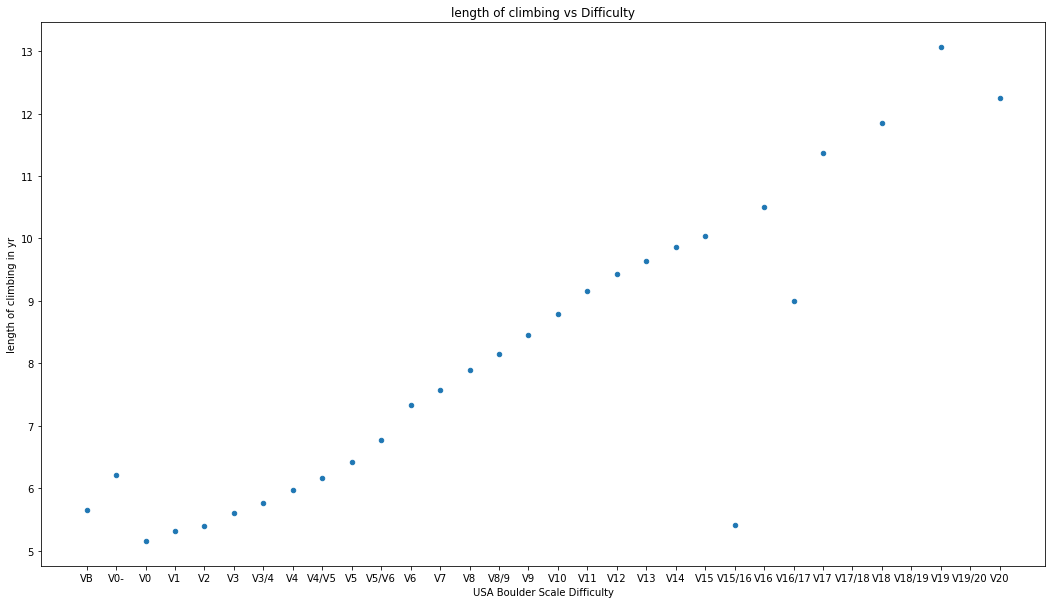

In [92]:
length_of_time_v_difficulty_test.groupby('usa_boulder_scale').mean().reset_index().plot(
    x='usa_boulder_scale', 
    y='length of climbing', 
    kind='scatter',
    title='length of climbing vs Difficulty',
    xlabel='USA Boulder Scale Difficulty',
    ylabel='length of climbing in yr',
    fontsize=10,
    figsize=[18, 10]

)